# Dimensionality Reduction

Problems:
* Memory
* Speed
* Accuracy
* Curse of dimensionality (Clustering)

### Feature Selection

* Variance Threshold
* ANOVA
* Recursive Feature Elimination
* Using Models

$$ y = x_1 + sin(6 \cdot pi \cdot x_2) + 0.1 \cdot \mathcal{N}(0, 1) $$ 

![](images/feature-selection/f-mi.png)

![](images/feature-selection/forest-importances.png)

In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3],
     [0, 1, 4, 3],
     [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

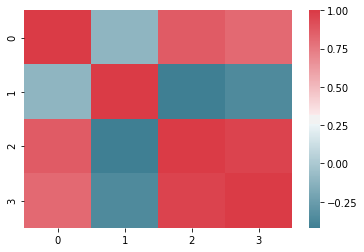

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
sns.heatmap(pd.DataFrame(X).corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X, y = load_iris(return_X_y=True)
print('Before feature selection:', X.shape)

selector = SelectKBest(f_classif, k=2).fit(X, y)
X_new = selector.transform(X)
print('After feature selection:', X_new.shape)
print('Scores:', selector.scores_)

Before feature selection: (150, 4)
After feature selection: (150, 2)
Scores: [  119.26450218    47.3644614   1179.0343277    959.32440573]


#### Question: Consider there is a feature with a score far better than other features. Is this feature a good choice?

### Unsupervised Learning: Principal Component Analysis (PCA)

Principal component analysis is a dimensionality reduction algorithm that we can use to find structure in our data.The main aim is to find surface onto which projection errros are minimized.This surface is a lower the dimensional subspace spanned by principal components of the data. These principal components are the direction along which the projection of the data onto that axis hae the maximum variance.The main component along which the data varies is called the principal axis of variation.


### Intuitive interpretation of PCA

At the first step we plot a data an with 2 dimenstion and try to reduce it to one 

![](images/PCA/pca_two.png)

![](images/PCA/source.gif)

### ** Don't get confused ** 
**PCA is different from linear regression**

![](images/PCA/pcaVSlreg.png)

### How about If we have three-dimensional





![](images/PCA/3d/3d_data.jpg)
![](images/PCA/3d/3d_data_pca_axis.jpg)
![](images/PCA/3d/3d_data_pca.jpg)



## Using PCA in Sklearn 



In [4]:
import sklearn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
import gzip, pickle, sys 
f = gzip.open('Datasets/mnist.pkl.gz', 'rb')
(input_train, output_train), (input_test, output_test), _ = pickle.load(f, encoding='bytes')

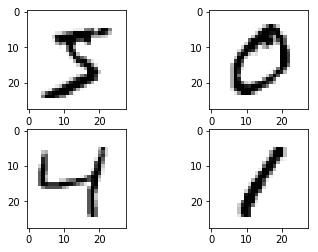

In [6]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_train[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
randomforest = RandomForestClassifier(n_estimators=30)

In [9]:
randomforest.fit(input_train,output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(output_test, randomforest.predict(input_test)))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       991
          1       0.98      0.99      0.98      1064
          2       0.96      0.97      0.96       990
          3       0.96      0.96      0.96      1030
          4       0.96      0.96      0.96       983
          5       0.96      0.94      0.95       915
          6       0.98      0.98      0.98       967
          7       0.97      0.97      0.97      1090
          8       0.95      0.95      0.95      1009
          9       0.95      0.94      0.94       961

avg / total       0.97      0.97      0.97     10000



In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=500)
pca.fit(input_train)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

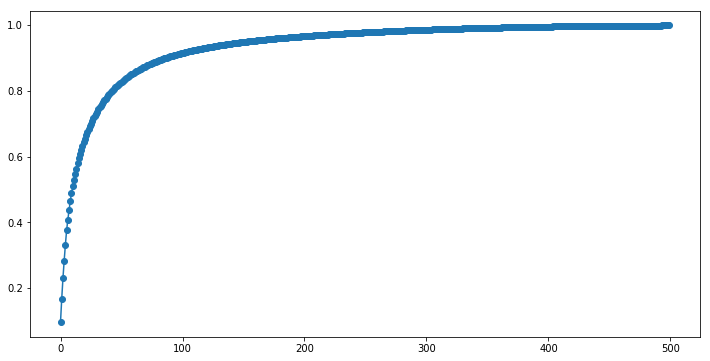

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:500]),marker = 'o')
plt.show()

In [14]:
np.cumsum(pca.explained_variance_ratio_[0:500])[200]

0.96679789

In [15]:
pca = PCA(n_components= 200)
pca.fit(input_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
x_train = pca.transform(input_train)
x_test = pca.transform(input_test)

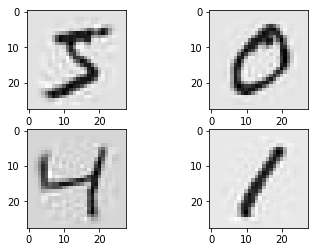

In [17]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(pca.inverse_transform(x_train)[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()

In [18]:
randomforest = RandomForestClassifier(n_estimators=30)

In [19]:
randomforest.fit(x_train,output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(output_test, randomforest.predict(x_test)))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       991
          1       0.98      0.98      0.98      1064
          2       0.92      0.94      0.93       990
          3       0.90      0.92      0.91      1030
          4       0.91      0.94      0.93       983
          5       0.93      0.89      0.91       915
          6       0.96      0.97      0.96       967
          7       0.95      0.94      0.94      1090
          8       0.93      0.89      0.91      1009
          9       0.93      0.89      0.91       961

avg / total       0.94      0.94      0.93     10000



---
### Feature Extraction

![](images/feature-selection/polar.png)

![](images/feature-selection/ts.png)

![](images/feature-selection/ed.png)